## Suppl. Fig2: faceted volcano plot

In [1]:
from pathlib import Path
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from datetime import datetime
import pandas as pd
from pathlib import Path

script_path = Path.cwd().parent.parent.parent  / "script"
data_path = Path.cwd().parent.parent.parent  / "data"
sys.path.append(str(script_path))
from utils.volcano import load_volcano_data

output_dir = Path.cwd() / "output"
output_dir.mkdir(exist_ok=True)

### Load data

In [2]:
timestamp = datetime.now().strftime('%Y-%m-%d')
print(f"Timestamp: {timestamp}")    

Timestamp: 2023-12-05


In [3]:
#manually set the timestamp to use the intermediate results from another date
timestamp = "2023-12-04"

In [4]:
# define files to load
enrichment_dir = Path.cwd().parent.parent / "enrichment"
volcano_csv_path = enrichment_dir / "output" / "enrichment_and_volcano_tables" / f'{timestamp}_volcano_table.csv'
clusters_csv = data_path / "labels" / "cluster_annotation_Dec5.csv"

try:
    # load the file
    volcano_df, ip_name_with_comparts, Gene_name_canonical, cluster_highlights = load_volcano_data(volcano_csv_path, clusters_csv)
except FileNotFoundError:
    print(f"File {volcano_csv_path} not found.\nPlease run the enrichment analysis first or specify the correct timestamp, current value is {timestamp}")
except pd.errors.ParserError:
    print(f"There was an error parsing the CSV file at {volcano_csv_path}.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [5]:
# check cluster_highlights are in cluster_annotation
# cluster_highlights is a list clusters names to highlight in each pulldown
Nov16_cluster_labels = volcano_df[("metadata", "cluster_annotation")].unique()
for i in cluster_highlights:
    for j in i:
        print(f"{j} not in cluster_annotation") if j not in Nov16_cluster_labels else None

### Set up a grid of subplots

In [6]:
# number of sub plots
print(f"number of subplots: {len(ip_name_with_comparts)}")
nrows = 6
ncols = 6
print(f"nrows: {nrows}, ncols: {ncols}")

number of subplots: 36
nrows: 6, ncols: 6


### Fill the grid of subplots

In [7]:
# settings
fig_width = 17 # inch (2x letter width 8.5)
fig_height = 22 # inch (2x letter height 11)
highlight_color = "#fc8c03"
rest_points_color = "#d6d4d4"
plt.rcParams['pdf.fonttype'] = 42 # for illustrator
rasterized_points = True # rasterize the datapoints, or else import to illustrator will be very slow

In [8]:
volcano_df

metadata  \
                                            Protein IDs   
0         A0A023T6R1;Q96A72;F5H6P7;F5H6N1;F5H3U9;F5H124   
1                          Q9Y5S9;A0A023T787;A0A0J9YW13   
2     A0A0C4DFM1;A0A024QYR3;Q92544;B4DH88;B4DKC1;Q6Z...   
3     A0A024QYR6;A0A1V0DNR7;A0A6G6A825;F6KD02;F6KD01...   
4                              Q99805;A0A024QYR8;B3KSG9   
...                                                 ...   
8594                                             X5D7P8   
8595                                             X5D8X9   
8596  X5DQV1;X5DNI1;B3KV96;E9PD68;B3KXQ5;Q14194;B3KT...   
8597                                             X5DQZ7   
8598                                             X6RHX1   

                                                                          \
                                   Majority protein IDs       Gene names   
0                       A0A023T6R1;Q96A72;F5H6P7;F5H6N1  FLJ10292;MAGOHB   
1                                     Q9Y5S9;A0A023T787       RBM8A;RBM8   
2     A0A0C4DFM1;A0A024QYR3;Q92544;B4DH88;B4DKC1;Q6ZTK5           TM9SF4   
3     A0A024QYR6;A0A1V0DNR7;A0A6G6A825;F6KD02;F6KD01...             PTEN   
4                              Q99805;A0A024QYR8;B3KSG9           TM9SF2   
...                                                 ...              ...   
8594                                             X5D7P8            STK39   
8595                                             X5D8X9          CNTNAP2   
8596  X5DQV1;X5DNI1;B3KV96;E9PD68;B3KXQ5;Q14194;B3KT...            CRMP1   
8597                                             X5DQZ7             GPX1   
8598                                             X6RHX1            SCYL3   

     SEC61B (ER)           TOMM20 (mitochondria)           LAMP1 (lysosome)  \
      enrichment     pvals            enrichment     pvals       enrichment   
0      -0.139405  0.189235             -0.654515  0.759064        -0.266874   
1      -0.631700  0.199019             -2.248450  4.454473        -0.588500   
2       4.080419  0.944260             -1.491024  1.087820         3.421906   
3      -0.874511  0.654217             -0.365514  0.145194         0.959333   
4       7.104435  1.036194             -4.523732  0.720030         5.796589   
...          ...       ...                   ...       ...              ...   
8594    0.967365  0.438208              1.616812  1.100110         0.362894   
8595   -0.021208  0.089118             -0.213794  0.135745         0.194316   
8596    0.491496  0.315373              0.351342  0.468024         0.040040   
8597    0.184980  0.217598              2.120314  3.597795        -0.876673   
8598    0.105110  0.198755             -0.494049  0.201877         0.083745   

               RAB14 (recycling endosome)  ... CEP350 (centrosome)            \
         pvals                 enrichment  ...          enrichment     pvals   
0     0.311541                   0.641974  ...            0.160560  0.284014   
1     0.053240                  -0.984800  ...            0.895300  0.780361   
2     0.507631                   4.320300  ...            0.397300  0.471136   
3     0.606543                  -0.412718  ...            0.064974  0.055174   
4     0.818942                   8.061546  ...           -0.438800  0.008888   
...        ...                        ...  ...                 ...       ...   
8594  0.002086                   0.546989  ...            0.428594  0.609772   
8595  0.493149                   0.356751  ...            1.947072  0.761989   
8596  0.005968                   1.146720  ...           -0.044831  0.030429   
8597  0.891154                   0.025663  ...            0.828155  0.147622   
8598  0.149033                   0.466224  ...            0.931407  0.772576   

     ATG101 (autophagosome)           PEX3 (peroxisome)            \
                 enrichment     pvals        enrichment     pvals   
0                  3.270767  2.556870         -0.086078  0.015457   
1             

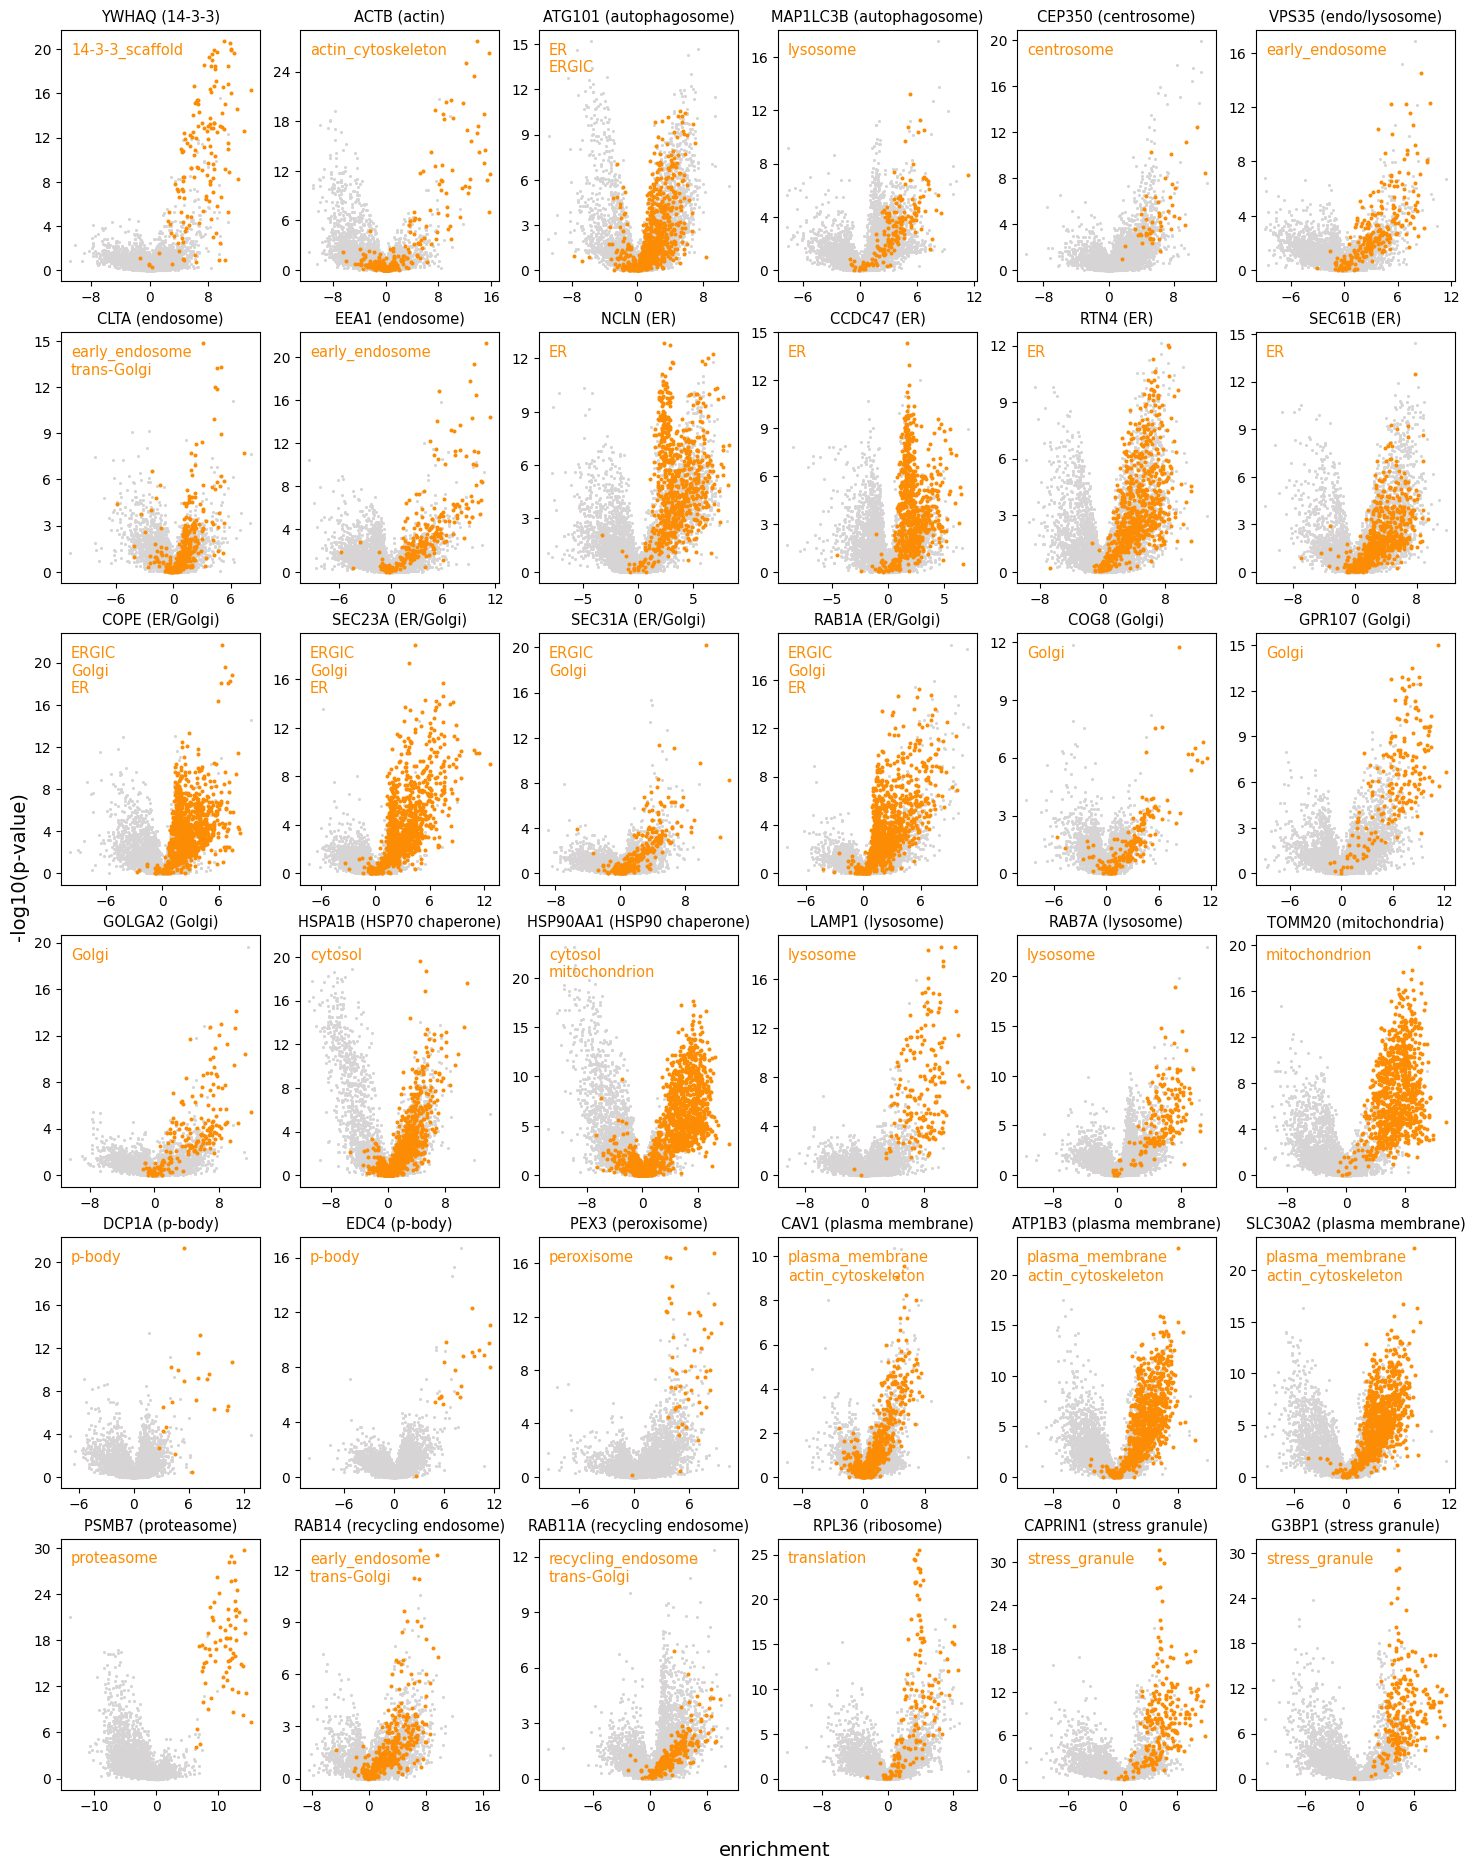

In [9]:
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)  
fig.set_size_inches(fig_width, fig_height) # Set the figure size to letter size (8.5 x 11 inches)
fig.subplots_adjust(left=0.08, bottom = 0.08) # set the left and bottom margin for x and y axis labels

idx = 0
for r in range(nrows):
    for c in range(ncols):
        # get data for a specific pulldown
        n = ip_name_with_comparts[idx]
        pulldown_df = volcano_df[n].copy()
        pulldown_df.rename(columns={"pvals": " -log10(p-value)"}, inplace=True)
        pulldown_df["p-value"] = round(10**(-pulldown_df[" -log10(p-value)"]), 4)
        pulldown_df["Gene name canonical"] = volcano_df.loc[:,('metadata', 'Gene_name_canonical')]
        pulldown_df["cluster_annotation"] = volcano_df.loc[:,('metadata', 'cluster_annotation')]

        # highlights
        current_highlights = cluster_highlights[idx] # get the list of Nov16 clusters to highlight
        colors = [highlight_color if c in current_highlights else rest_points_color for c in pulldown_df["cluster_annotation"]]

        # draw volcano plot (uniform size of points)
        #axs[r,c].scatter(x=pulldown_df["enrichment"], y=pulldown_df[" -log10(p-value)"], s=1.5, color=colors)

        # draw volcano plot (highlighted points are bigger)
        hilighted_point_size = 3.5
        rest_point_size = 1.5
        highlight_df = pulldown_df[pulldown_df["cluster_annotation"].isin(current_highlights)]
        rest_df = pulldown_df[~pulldown_df["cluster_annotation"].isin(current_highlights)]
        axs[r,c].scatter(x=rest_df["enrichment"], y=rest_df[" -log10(p-value)"], s=rest_point_size, color=rest_points_color, rasterized=rasterized_points)
        axs[r,c].scatter(x=highlight_df["enrichment"], y=highlight_df[" -log10(p-value)"], s=hilighted_point_size, color=highlight_color, rasterized=rasterized_points)
       
        # set title
        axs[r,c].set_title(ip_name_with_comparts[idx], fontsize=10.5)

        # add text to denote the highlighted clusters
        axs[r,c].text(0.05, 0.95, "\n".join(current_highlights), ha="left", va ="top", color=highlight_color,transform=axs[r,c].transAxes, fontsize=10.5) 

        # Force x-axis to display integer ticks, 
        axs[r,c].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))
        # Force y-axis to display integer ticks, or else the gap between plots will be different
        axs[r,c].yaxis.set_major_locator(MaxNLocator(integer=True, nbins=6))

        idx += 1

# set a common y axis label
fig.text(0.05, 0.5, '-log10(p-value)', va='center', rotation='vertical', fontsize=14)
# set a common x axis label
fig.text(0.5, 0.05, 'enrichment', ha='center', fontsize=14)
# save figure as pdf
fig.savefig(output_dir / "Suppl_fig2.pdf", bbox_inches='tight', dpi=300, format = "pdf")